In [1]:

import numpy as np
import pickle
import matplotlib.pyplot as plt
from minisom import MiniSom  
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from scipy import cluster





In [2]:
print("SOM Assignment - 10 clusters data set")

SOM Assignment - 10 clusters data set


In [3]:
clusters10_data = np.genfromtxt('10clusters.vec', skip_header=4, usecols=list(range(10)))

In [4]:
clusters10_som_small = MiniSom(20, 25, 10, sigma=10, learning_rate=0.5,random_seed=10)
clusters10_som_small.train_random(clusters10_data, 10000)
clusters10_som_big = MiniSom(100, 60, 10, sigma=20, learning_rate=0.5,random_seed=10)
clusters10_som_big.train_random(clusters10_data, 10000)

In [5]:
# EVALUATION: QUANTIZ ERR

In [6]:


print("Ev Small SOM")
print(clusters10_som_small.quantization_error(clusters10_data))
print(clusters10_som_small.topographic_error(clusters10_data))
print("Mean of Quantization error:")
print(clusters10_som_small.quantization_error(clusters10_data)/20*25)


print("Ev Big SOM")
print(clusters10_som_big.quantization_error(clusters10_data))
print(clusters10_som_big.topographic_error(clusters10_data))

print("Mean of Quantization error:")
print(clusters10_som_big.quantization_error(clusters10_data)/100*60)





Ev Small SOM
0.5969824747445428
0.0
Mean of Quantization error:
0.7462280934306784
Ev Big SOM
0.2123969709367468
0.00823529411764706
Mean of Quantization error:
0.12743818256204809


In [7]:
# HIERARCHICAL CLUSTERING

In [9]:



def hierarchy(weights):
    Z = cluster.hierarchy.linkage(weights,'single')
    d=cluster.hierarchy.dendrogram(Z,truncate_mode='level')
    plt.show()
    print(Z)

    cutree = cluster.hierarchy.cut_tree(Z, n_clusters=[2,20])
    labels=cutree[:,1]
    print("Labeling",labels)

    #print(cutree)
    return labels

#=hierarchy(weights)




In [13]:
def winners_labels(som,weights,labels,d1,d2):
    winners_labels = np.zeros(shape=(d1,d2))
    for cnt, xx in enumerate (weights):
        w = som.winner(xx)
        l = labels[cnt]
        winners_labels[w[0],w[1]] = l
    return winners_labels

def dif_matrix(label_matrix):
    dif_mat = np.zeros(shape=label_matrix.shape)
    for i,row in enumerate(label_matrix):
        for j,label in enumerate(row):
            if i < label_matrix.shape[0]-1 and label_matrix[i][j] != label_matrix[i+1][j]:
                dif_mat[i][j] = 1
            elif j < label_matrix.shape[1]-1 and label_matrix[i][j] != label_matrix[i][j+1]:
                dif_mat[i][j] = 1
    return dif_mat

#dif_matrix(winners_labels(clusters10_som_small,weights,labels,d1,d2))

#print(np.unique(dif_matrix(winners_labels(clusters10_som_small,weights,labels,d1,d2))))

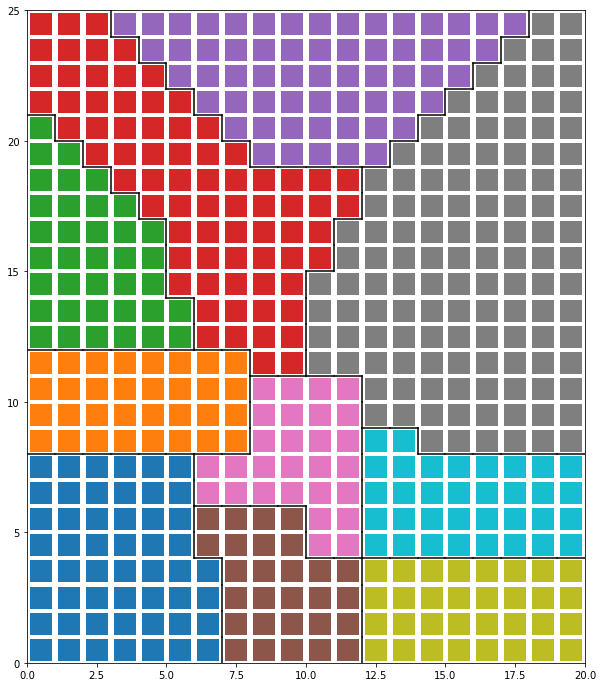

In [37]:

def plot_with_labelling(som, d1, d2, labels, coloring_labels, rweights, debug=False):

    plt.figure(figsize=(d1//2, d2//2))
    # Plotting the response for each pattern in the iris dataset
    #win_map = som.win_map(rweights)
    #plt.pcolor(som.distance_map().T, cmap='bone_r')  # plotting the distance map as background
    #plt.colorbar()
    # use different colors and markers for each label
    #markers = ['o', 's', 'D']
    colors = ['C' + str(i) for i in np.unique(coloring_labels)]
    win_labels = winners_labels(som,rweights,labels,d1,d2)

    for cnt, xx in enumerate(rweights):
        w = som.winner(xx)  # getting the winner
        #w = xx
        # palce a marker on the winning position for the sample xx
        plt.plot(w[0]+.5, w[1]+.5, 's', markerfacecolor=colors[coloring_labels[cnt]],
                markeredgecolor=colors[coloring_labels[cnt]], markersize=20, markeredgewidth=2)
    def plot_borders(debug=False):
        border_color = lambda c : c if debug else 'black'
        for i,row in enumerate(win_labels):
            for j,v in enumerate(row):
                if j < win_labels.shape[1]-1 and v != row[j+1]:
                    plt.plot([i,i+1],[j+1,j+1], color=border_color('red'))
                if i < win_labels.shape[0]-1 and v != win_labels[i+1][j]:
                    plt.plot([i+1,i+1],[j,j+1], color=border_color('blue'))    
    plot_borders(debug)
    plt.axis([0, d1, 0, d2])
    plt.show()



def hierarchical_clust(som,d1,d2,n_clusters,ltype):
    
    weights = som.get_weights().reshape(d1*d2,-1)
    Z= cluster.hierarchy.linkage(weights,ltype)
    #print("SEEEEE HEEERE",Z)
    labels = cluster.hierarchy.cut_tree(Z, n_clusters)
    if type(n_clusters)==int:
        labels = [l[0] for l in labels]
        plot_with_labelling(som,d1,d2,labels,labels,weights,debug=False)
    else: 
        coloring_labels = labels.T[0]
        labels = labels.T[1]
        plot_with_labelling(som,d1,d2,coloring_labels,labels,weights,debug=False)

hierarchical_clust(clusters10_som_small,20,25,10,'ward')

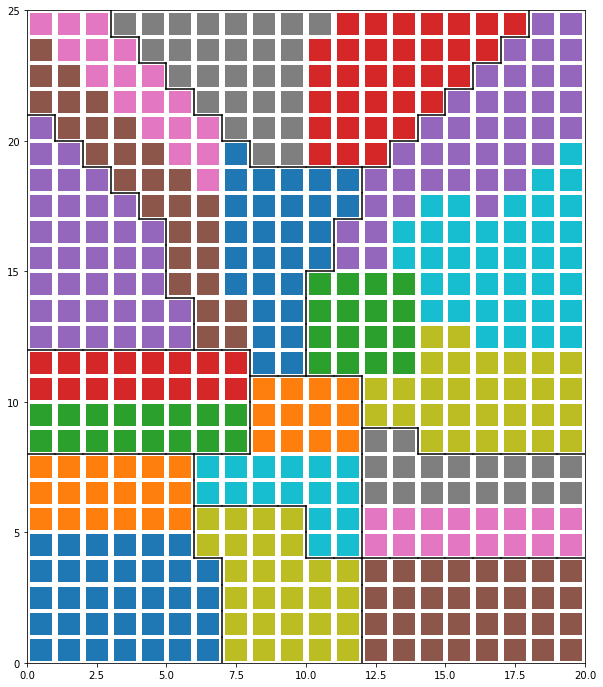

In [38]:
# EXTREME VALUES



hierarchical_clust(clusters10_som_small,20,25,[10,20],'ward')


In [20]:
# K-Means clustering

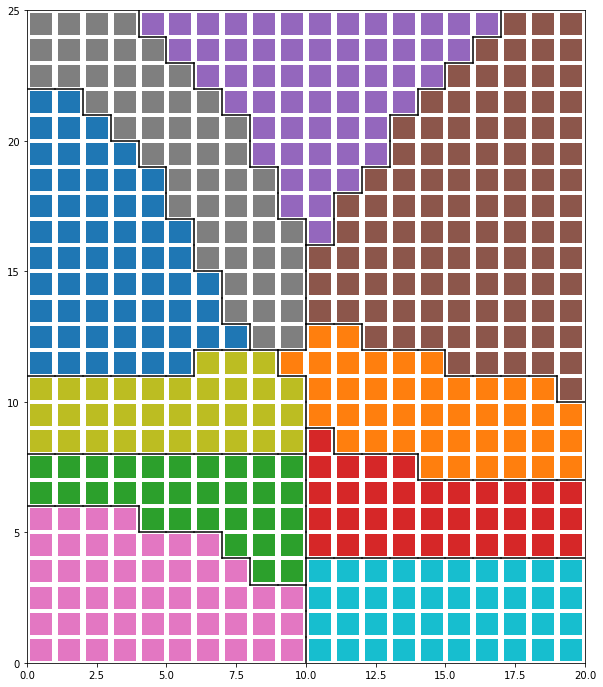

In [21]:


def kmeans_clust(som,d1,d2,n_clusters,random_state):
    weights = som.get_weights().reshape(d1*d2,-1) # first argument is product of first two dimensions of the input dataset
    labels = KMeans(n_clusters=n_clusters,random_state=random_state)
    km = labels.fit(weights)
    labels = km.labels_
    plot_with_labelling(som,d1,d2,labels,labels,weights,debug=False)
    

kmeans_clust(clusters10_som_small,20,25,10,0)

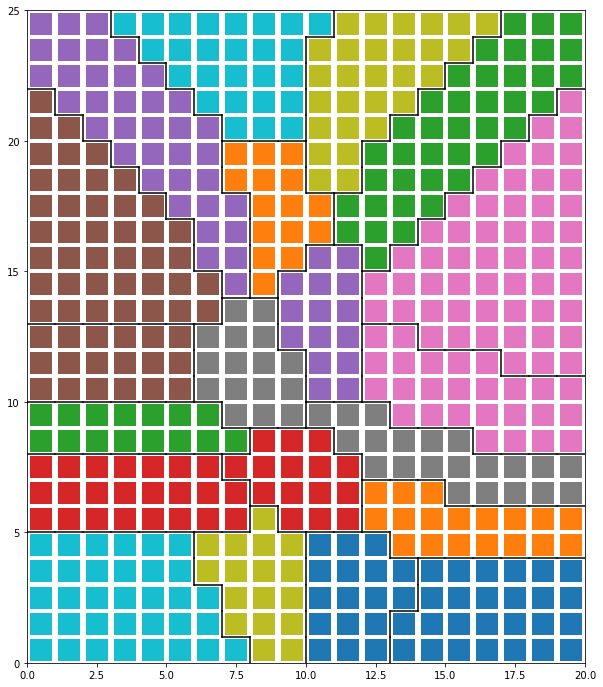

In [22]:
#EXTREME VALUES


kmeans_clust(clusters10_som_small,20,25,20,10)



In [23]:
#Hierarchical 100X60

SEEEEE HEEERE [[5.80000000e+01 5.90000000e+01 3.25843415e-03 2.00000000e+00]
 [1.18000000e+02 1.19000000e+02 3.50661736e-03 2.00000000e+00]
 [1.78000000e+02 1.79000000e+02 3.79865367e-03 2.00000000e+00]
 ...
 [1.19830000e+04 1.19920000e+04 2.17488948e+02 2.24900000e+03]
 [1.19930000e+04 1.19960000e+04 2.27701396e+02 3.78800000e+03]
 [1.19950000e+04 1.19970000e+04 6.08265334e+02 6.00000000e+03]]
SEEEEE HEEERE 6000


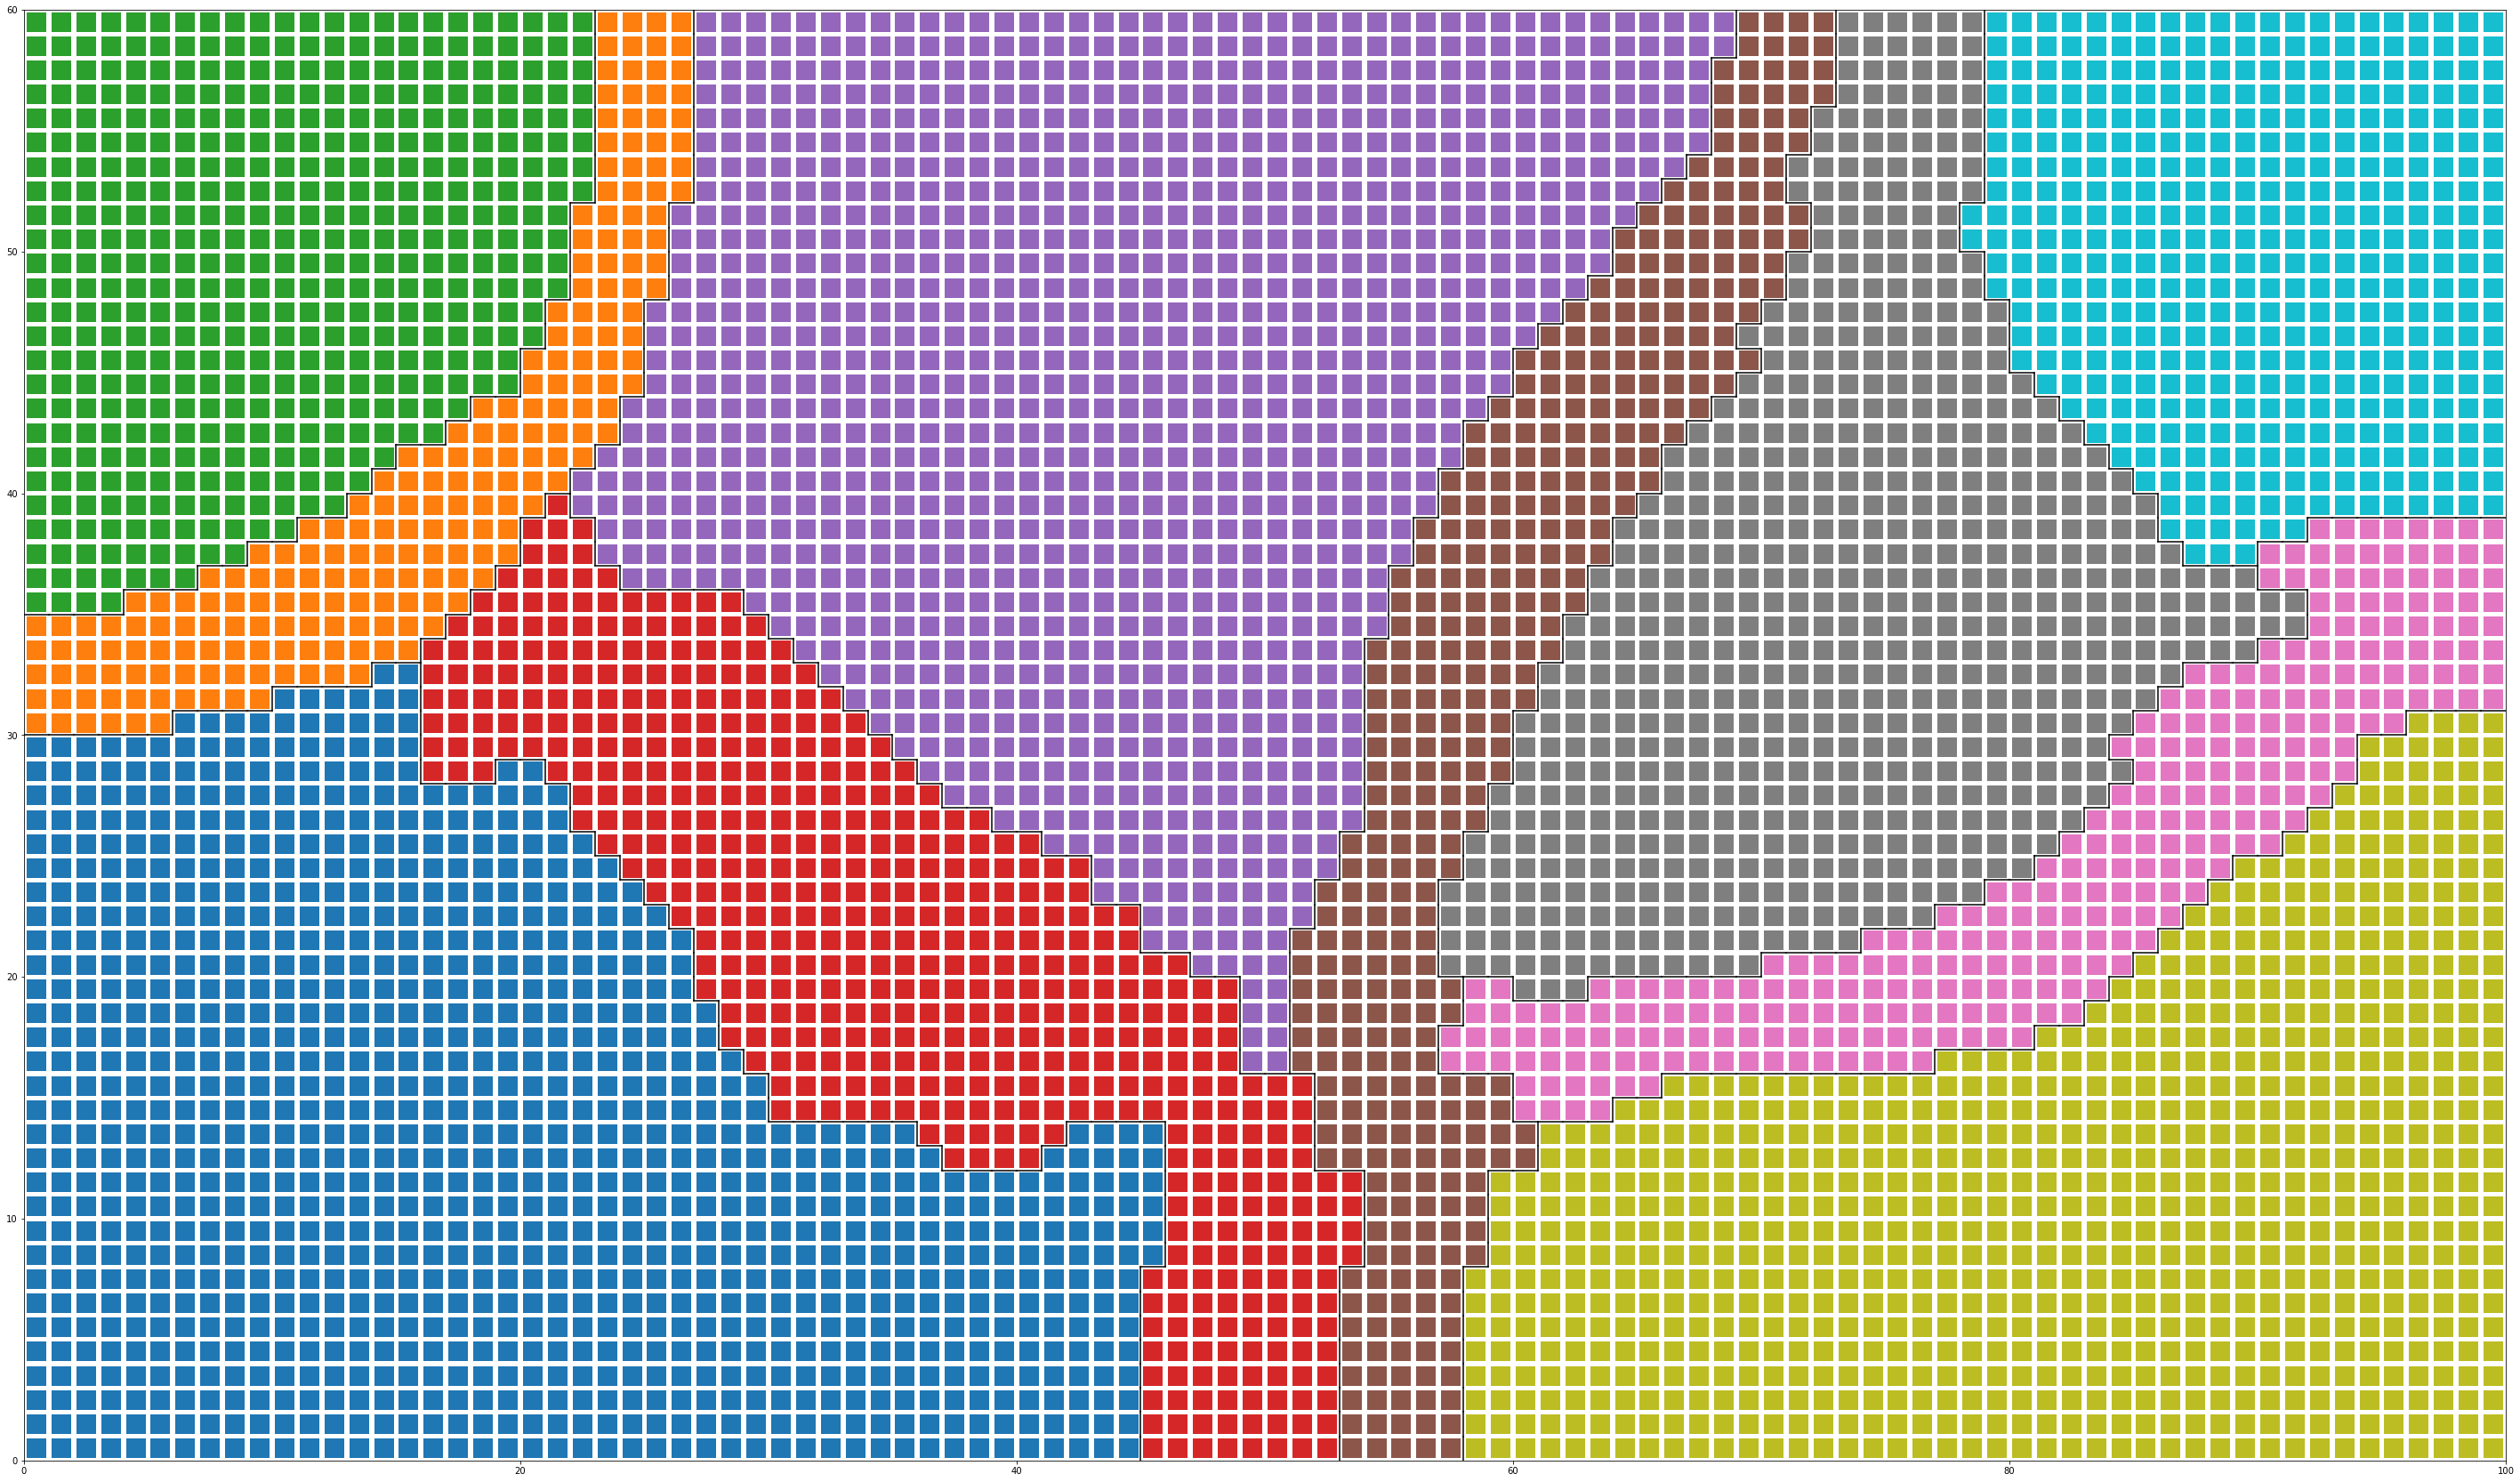

In [28]:

hierarchical_clust(clusters10_som_big,100,60,10,'ward')

SEEEEE HEEERE [[5.80000000e+01 5.90000000e+01 3.25843415e-03 2.00000000e+00]
 [1.18000000e+02 1.19000000e+02 3.50661736e-03 2.00000000e+00]
 [1.78000000e+02 1.79000000e+02 3.79865367e-03 2.00000000e+00]
 ...
 [1.19830000e+04 1.19920000e+04 2.17488948e+02 2.24900000e+03]
 [1.19930000e+04 1.19960000e+04 2.27701396e+02 3.78800000e+03]
 [1.19950000e+04 1.19970000e+04 6.08265334e+02 6.00000000e+03]]
SEEEEE HEEERE 6000


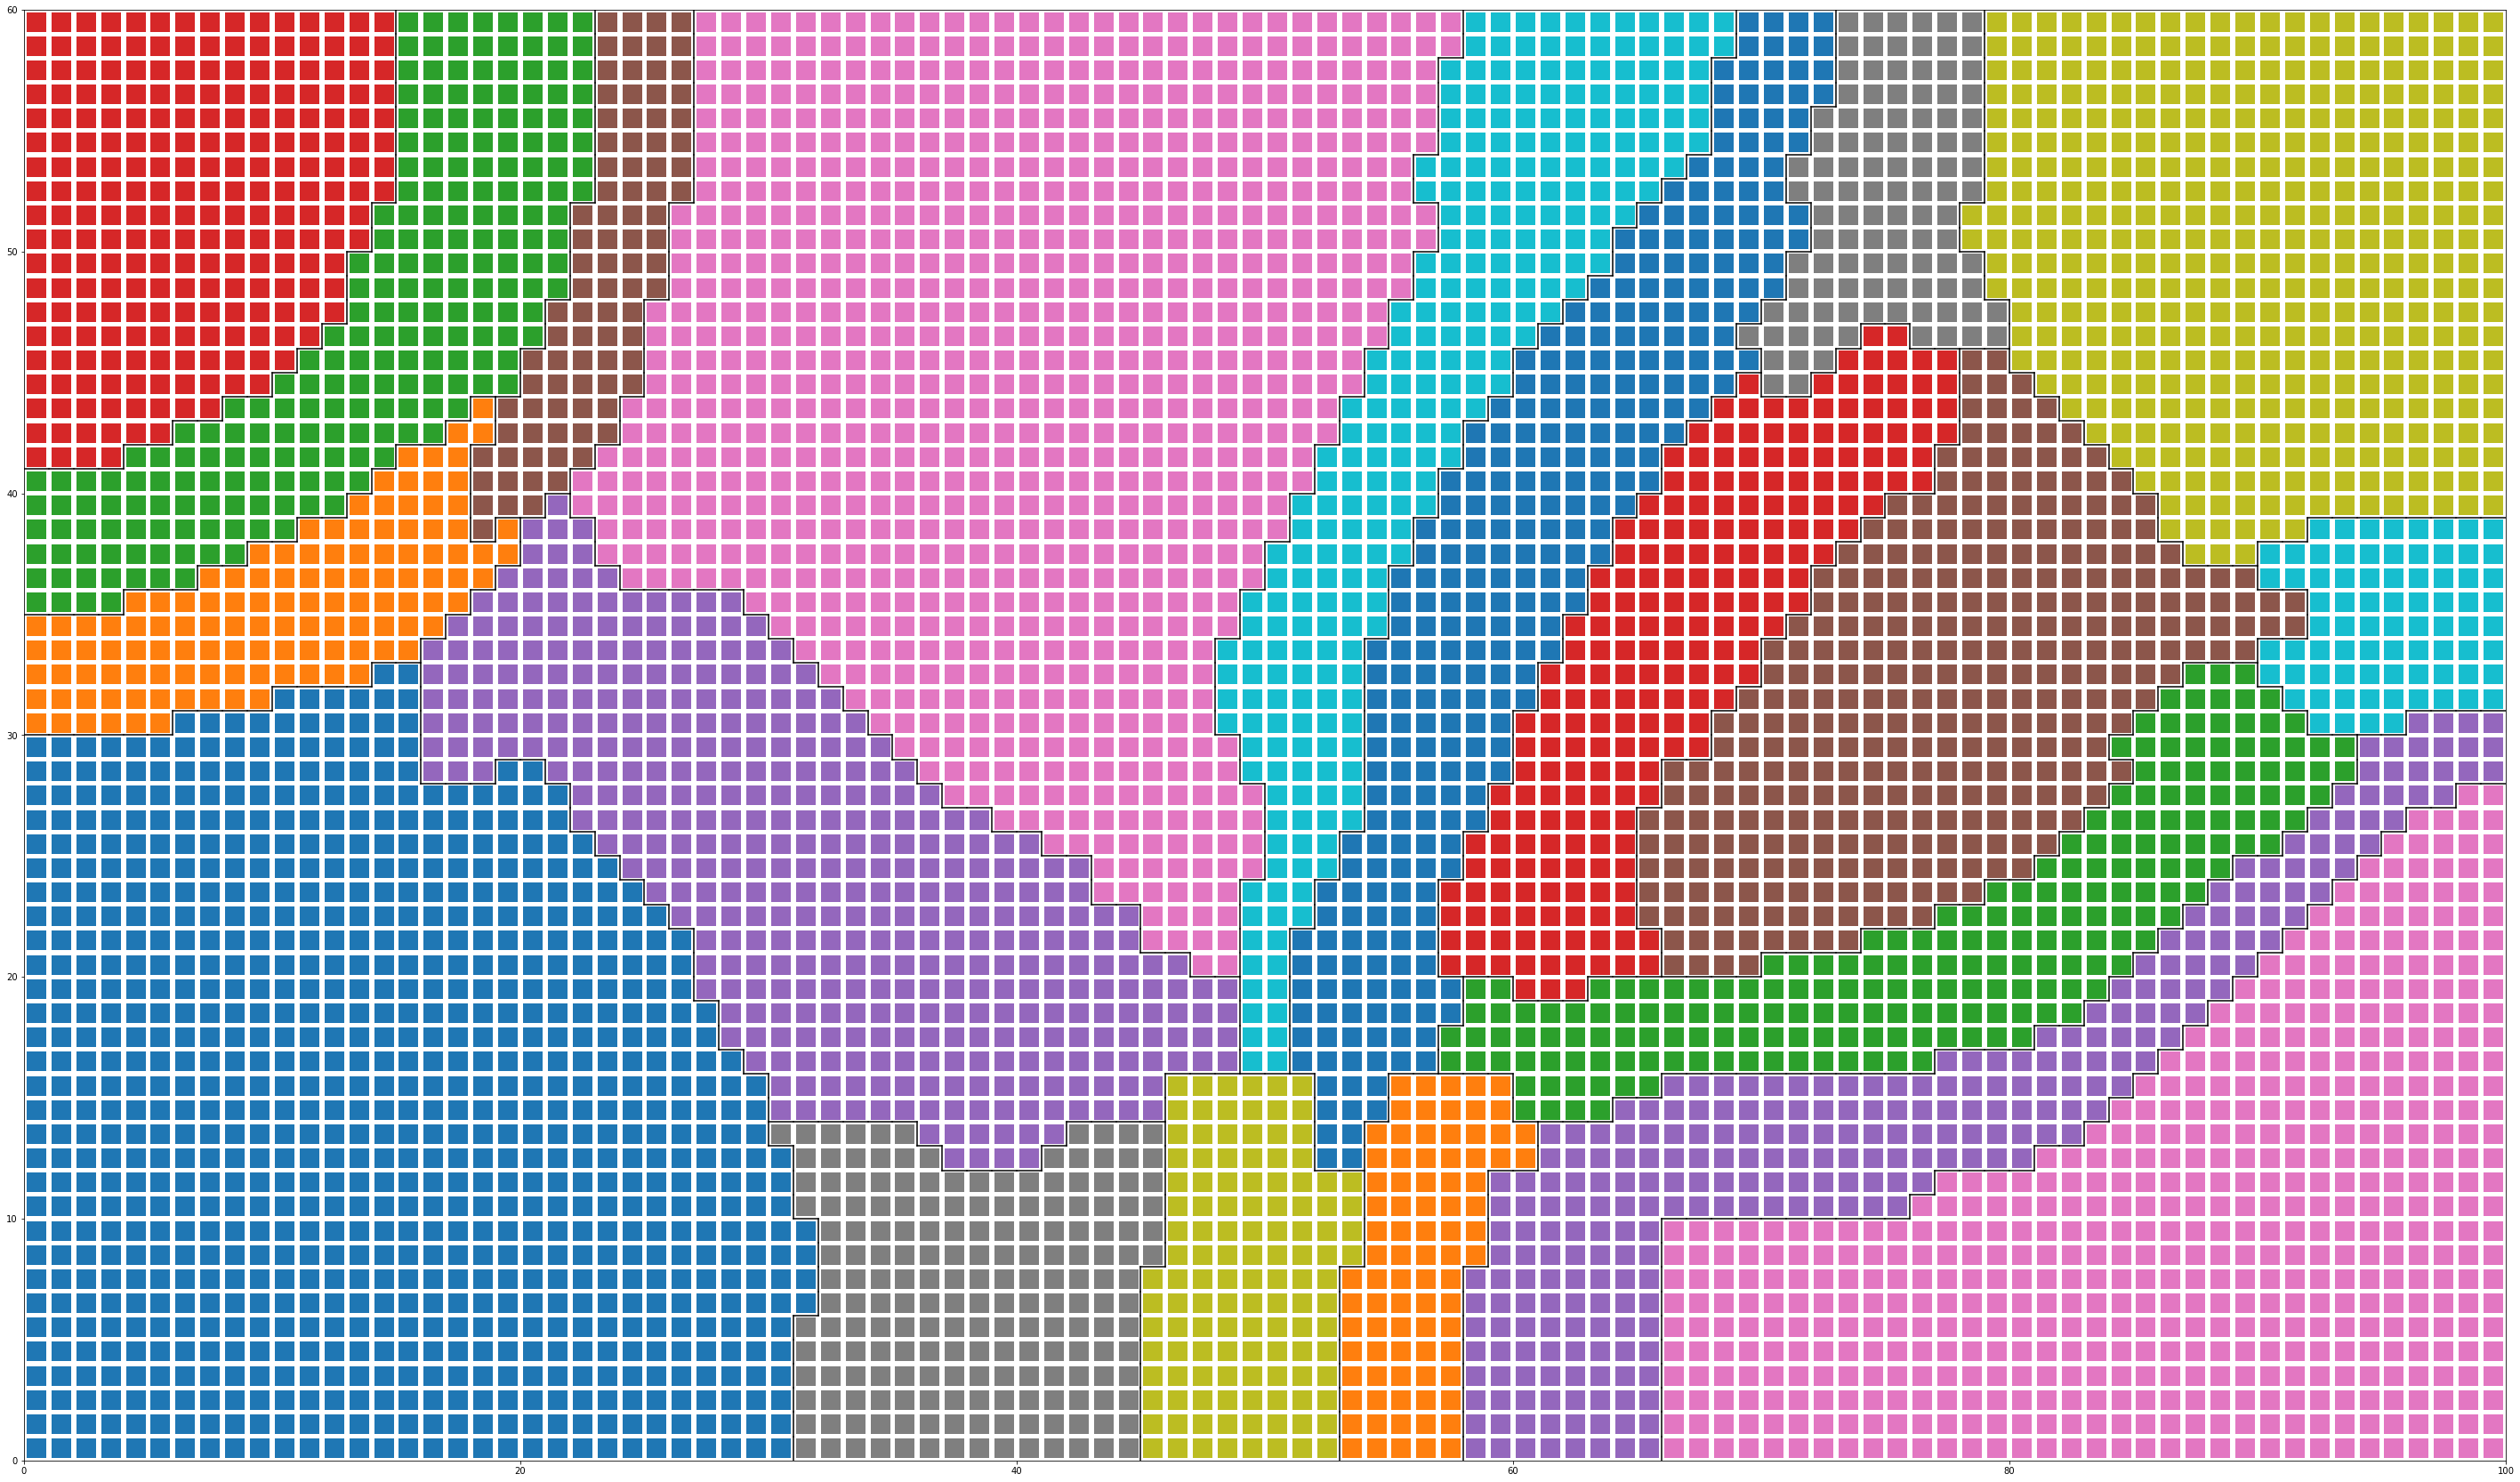

In [29]:
# EXTREME VALUES

hierarchical_clust(clusters10_som_big,100,60,20,'ward')

In [30]:
#Kmeans

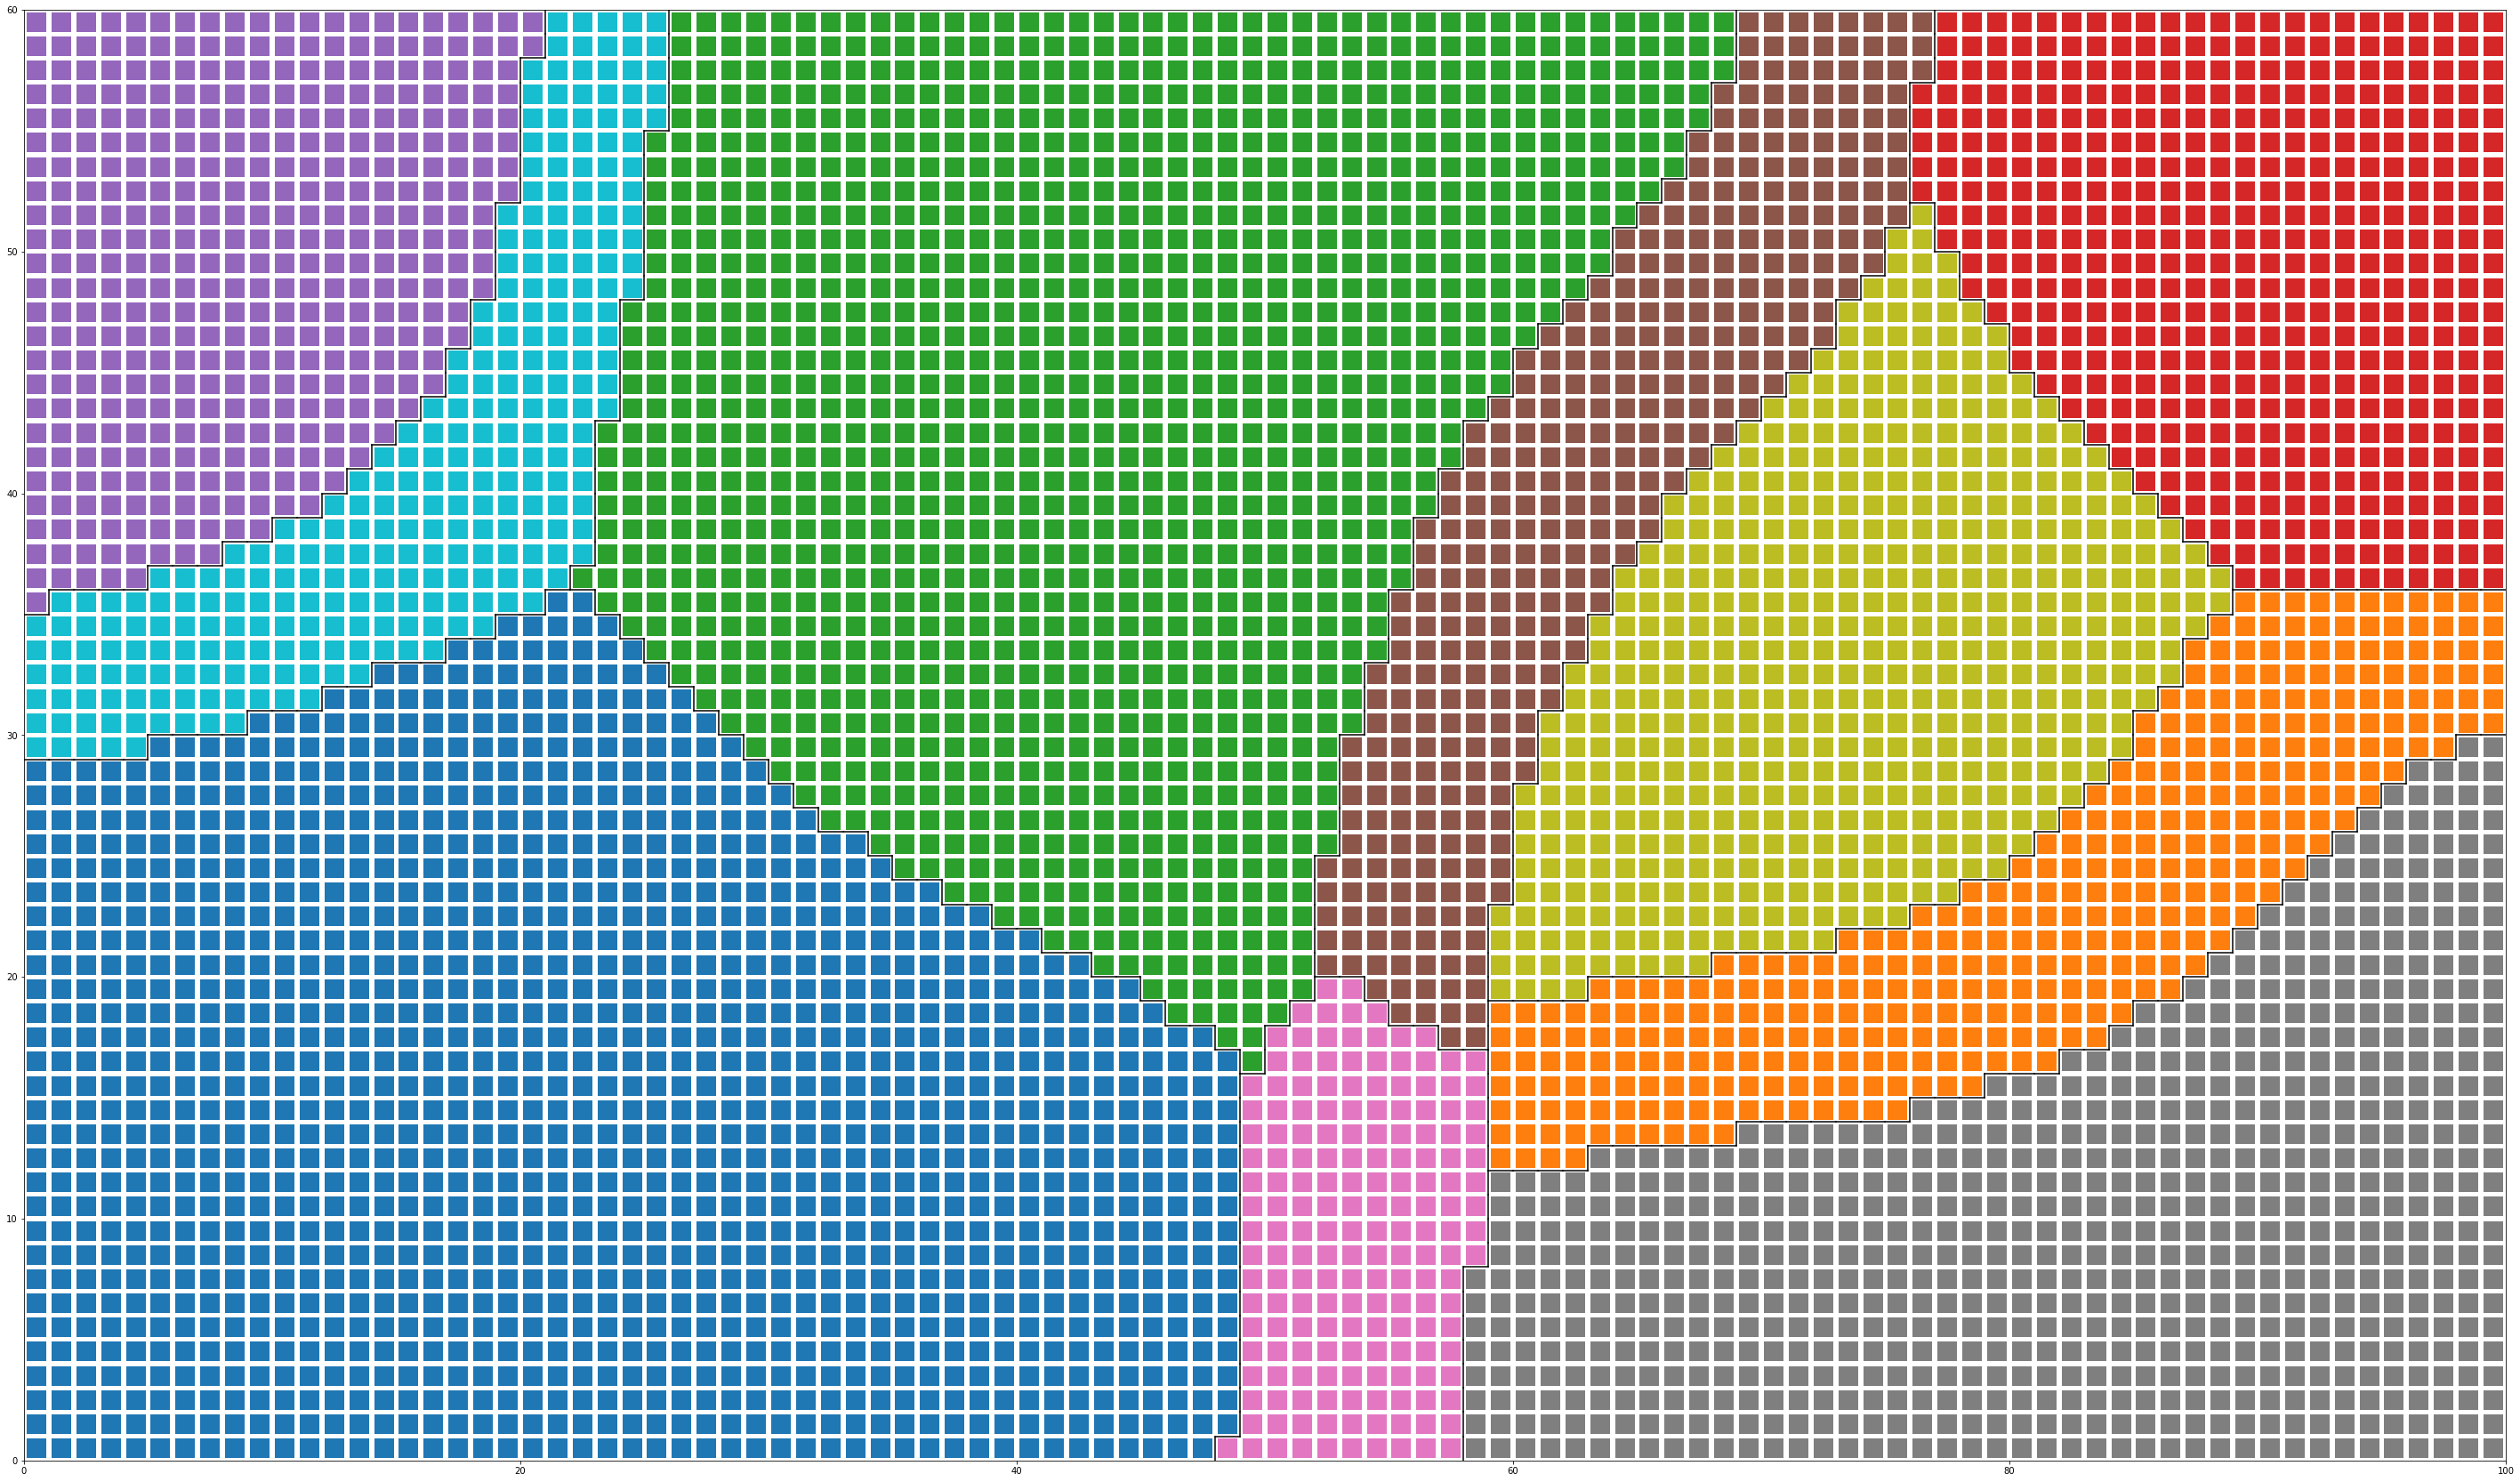

In [31]:
kmeans_clust(clusters10_som_big,100,60,10,0)



In [32]:
#EXTREME VALUES


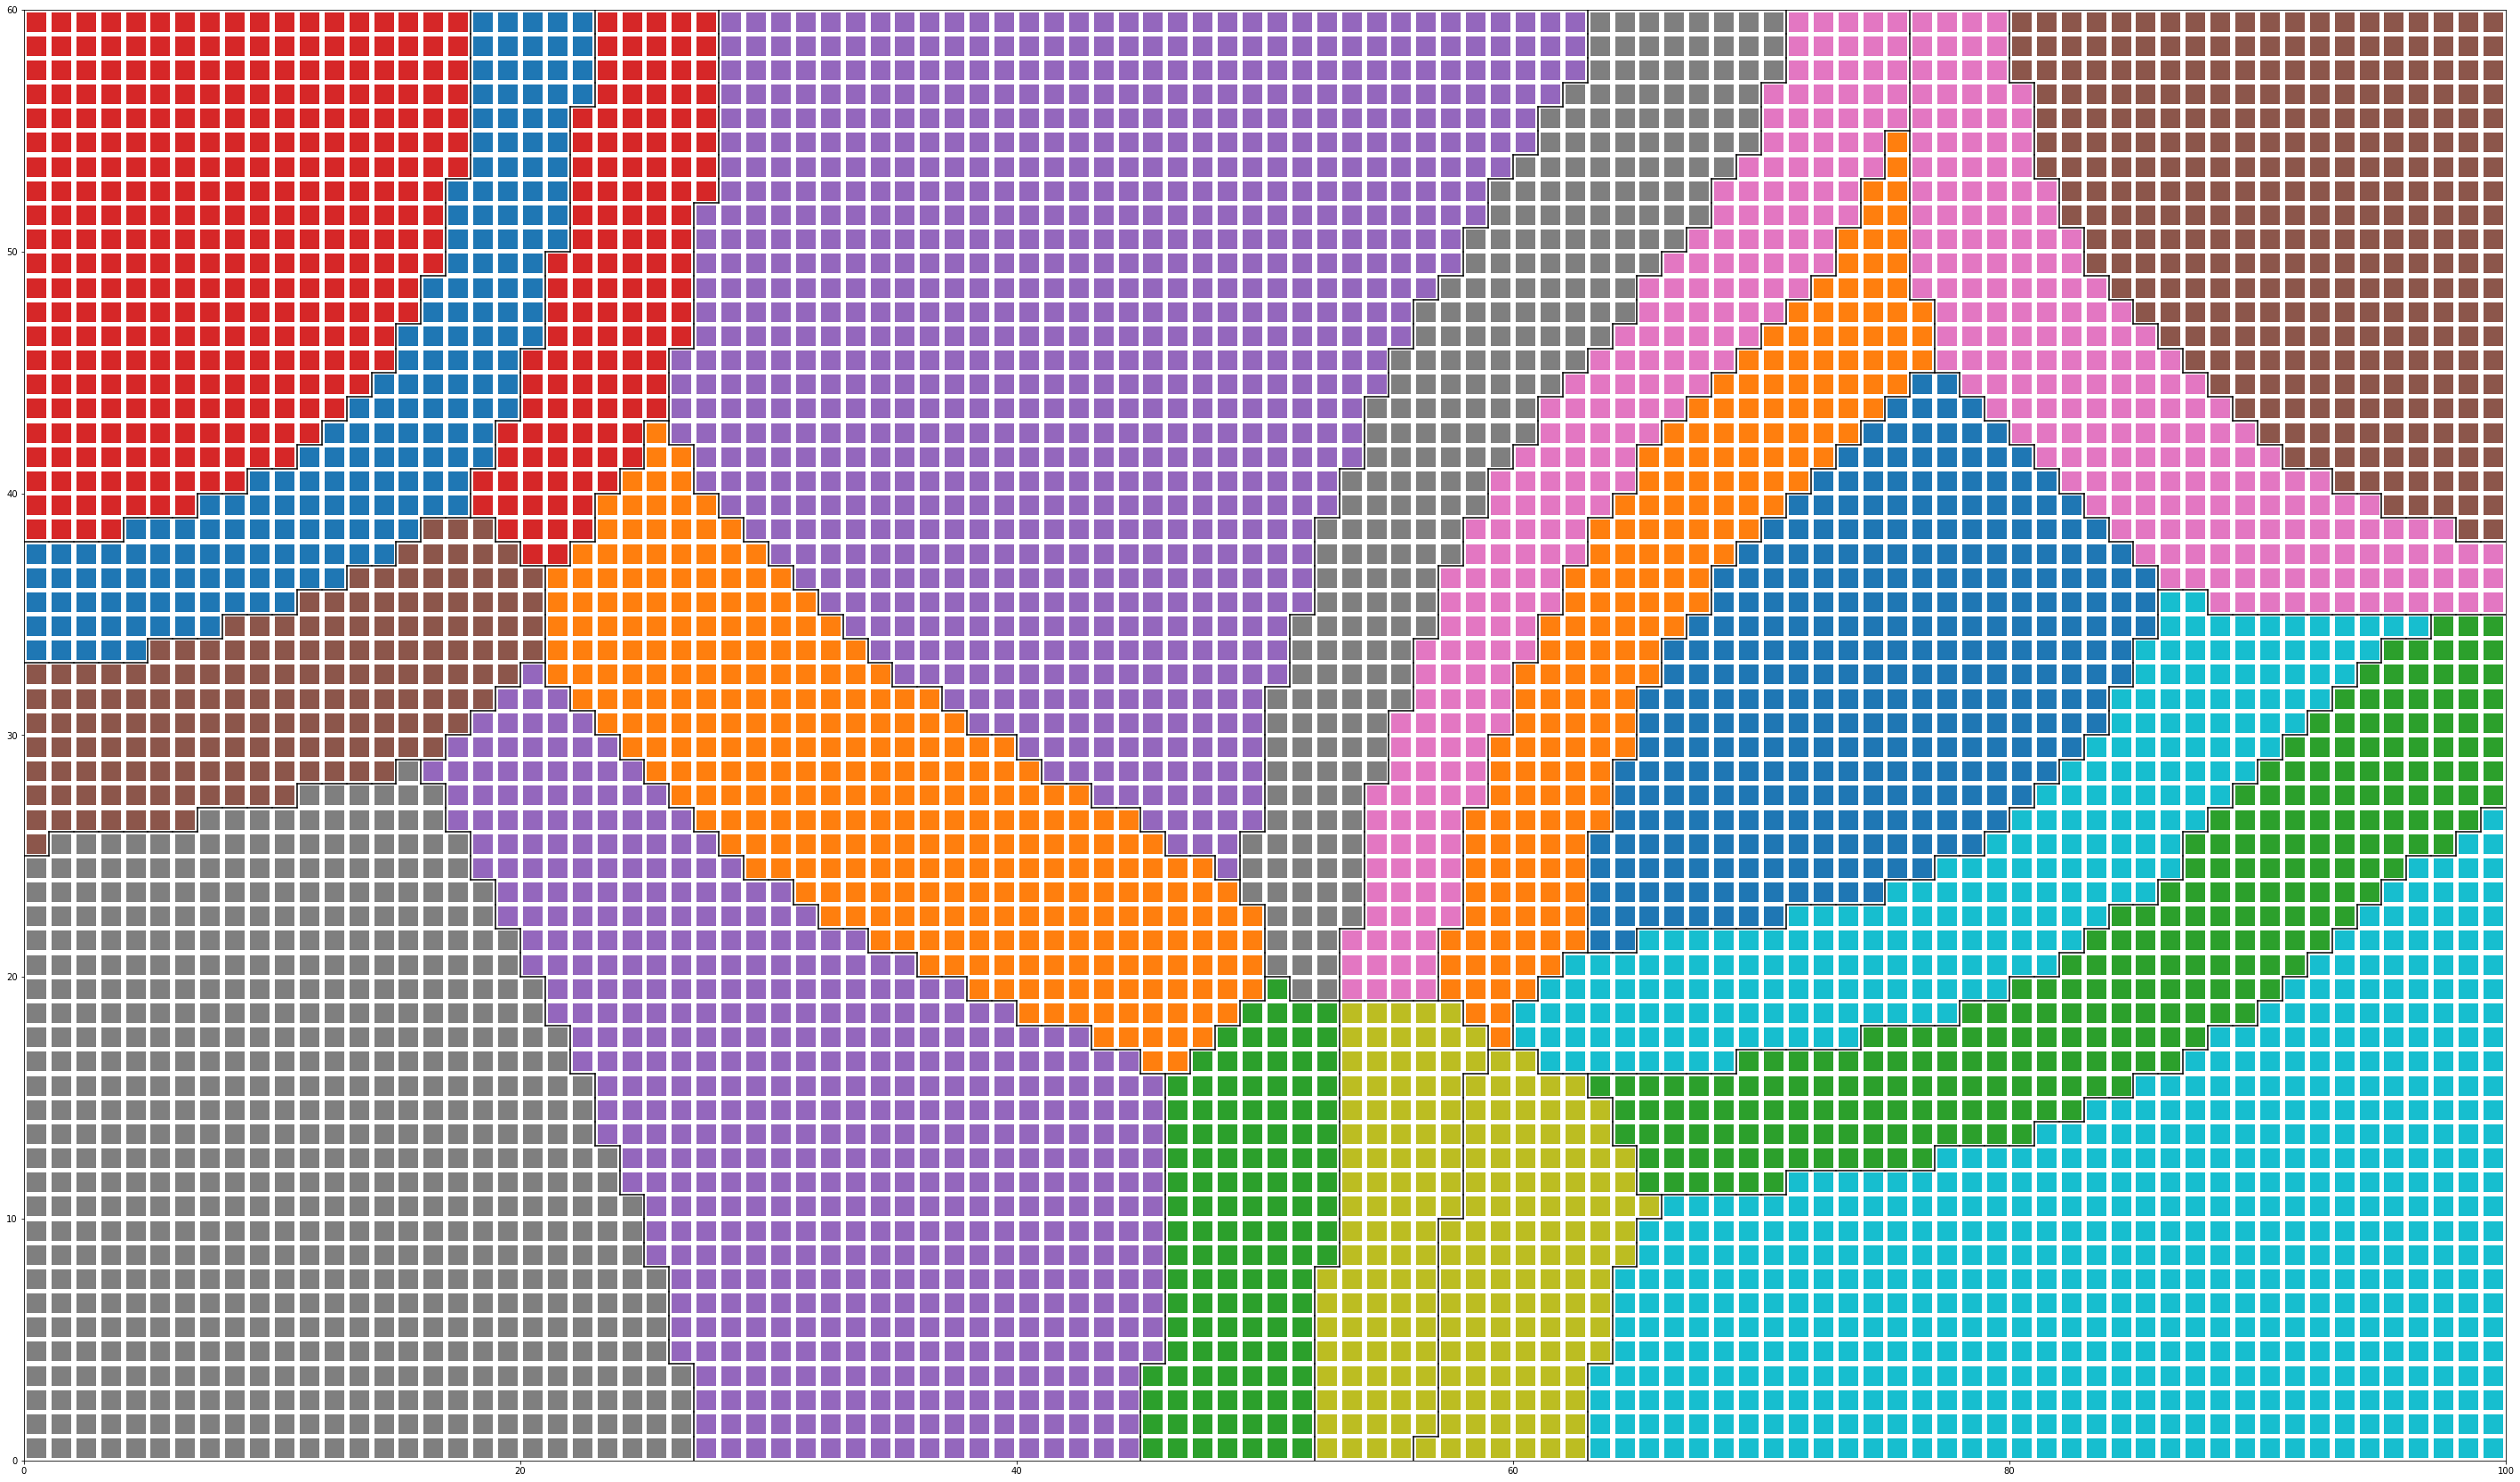

In [33]:
kmeans_clust(clusters10_som_big,100,60,20,5)